<a href="https://colab.research.google.com/github/luisfernandogbraga/ANALISE_DE_PRODUCAO_DULOREN/blob/main/PRODU%C3%87%C3%83O.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install odfpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 717.0/717.0 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for odfpy: filename=odfpy-1.4.1-py2.py3-none-any.whl size=160673 sha256=cddff1d9107444d9f1c7f6dac6b01caf6ccfdbf62a8d9d00bc68e4145995c49e
  Stored in directory: /root/.cache/pip/wheels/c8/2e/95/90d94fe33903786937f3b8c33dd88807f792359c6424b40469
Successfully built odfpy


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [5]:
excel= 'controle.ods'
df= pd.read_excel(excel) # ABRINDO O EXCEL EM UM DF

In [6]:
display(df)

,DATA,ARTIGO,MAQUINA,PESO,METRAGEM
0,2023-10-30,BALLI 16,817,2.4,998.4
1,2023-10-30,BELLES 15,801,6.0,1284.0
2,2023-10-30,MURITI 10,805,18.6,3534.0
3,2023-10-30,BALLI 16,815,2.4,998.4
4,2023-10-30,BELLES 15,814,7.8,1669.2
...,...,...,...,...,...
573,2024-01-23,MURITI 10,906,8.2,1098.8
574,2024-01-23,MURITI 10,906,8.7,1165.8
575,2024-01-23,08 DE LYCRA,902,10.0,3344.4
576,2024-01-23,MURITI 14,838,26.1,3497.4


In [ ]:
# df.drop('PESO', axis=1, inplace=True) # axis quer dizer que é uma coluna.
                                      # inplace para modificar o df existente

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 578 entries, 0 to 577
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DATA      578 non-null    datetime64[ns]
 1   ARTIGO    578 non-null    object        
 2   MAQUINA   578 non-null    int64         
 3   PESO      578 non-null    float64       
 4   METRAGEM  577 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 22.7+ KB


In [8]:
df['ARTIGO'].describe()

count           578
unique           20
top       BELLES 15
freq            139
Name: ARTIGO, dtype: object

In [9]:
# SALVANDO O DF EM UM CSV
df.to_csv('Arquivo.csv', index=False) # index=False evita a inclusão da coluna de índices no arquivo csv

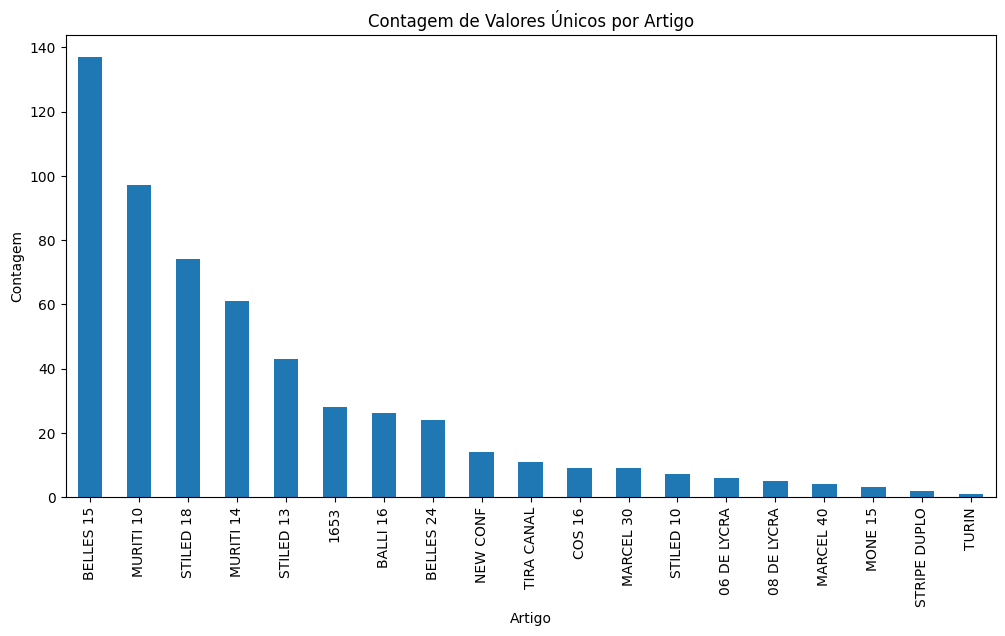

In [ ]:
artigo_counts = df['ARTIGO'].value_counts()
plt.figure(figsize=(12,6))
artigo_counts.plot(kind='bar')
plt.title('Contagem de Valores Únicos por Artigo')
plt.xlabel('Artigo')
plt.ylabel('Contagem')


plt.show()

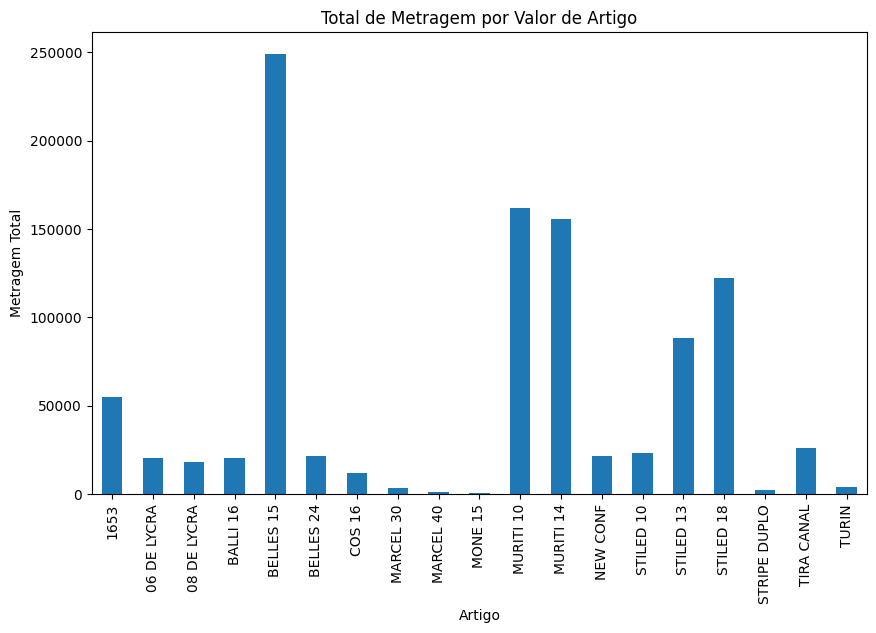

O valor da coluna ARTIGO com a maior metragem total é: BELLES 15


In [ ]:
# Calcular a metragem total para cada valor único na coluna 'ARTIGO'
metragem_por_artigo = df.groupby('ARTIGO')['METRAGEM'].sum()

# Encontrar o valor da coluna 'ARTIGO' com a maior metragem
artigo_maior_metragem = metragem_por_artigo.idxmax()

# Plotar um gráfico de barras ou um gráfico de pizza para visualizar as metragens por valor da coluna 'ARTIGO'
plt.figure(figsize=(10, 6))
metragem_por_artigo.plot(kind='bar')
plt.title('Total de Metragem por Valor de Artigo')
plt.xlabel('Artigo')
plt.ylabel('Metragem Total')
plt.show()

# Imprimir o valor da coluna 'ARTIGO' com a maior metragem
print(f'O valor da coluna ARTIGO com a maior metragem total é: {artigo_maior_metragem}')


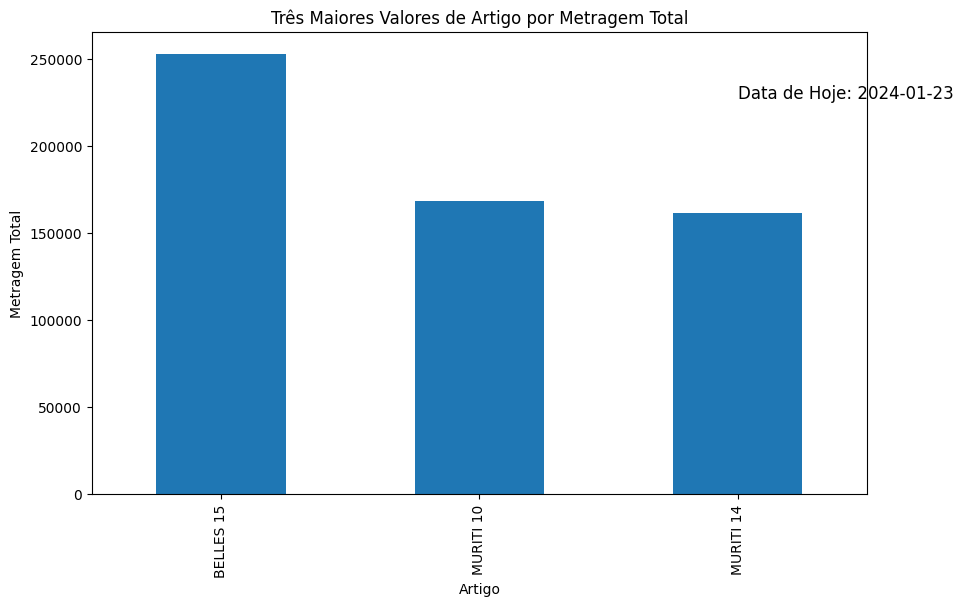

Os três valores da coluna 'ARTIGO' com a maior metragem são:
ARTIGO
BELLES 15    252477.20
MURITI 10    168371.96
MURITI 14    161711.20
Name: METRAGEM, dtype: float64


In [10]:
# Calcular a metragem total para cada valor único na coluna 'ARTIGO'
metragem_por_artigo = df.groupby('ARTIGO')['METRAGEM'].sum()

# Selecionar os três valores da coluna 'ARTIGO' com a maior metragem
top_artigos = metragem_por_artigo.nlargest(3)

# Plotar um gráfico de barras para os três valores da coluna 'ARTIGO' com a maior metragem
plt.figure(figsize=(10, 6))
top_artigos.plot(kind='bar')
plt.title('Três Maiores Valores de Artigo por Metragem Total')
plt.xlabel('Artigo')
plt.ylabel('Metragem Total')

# Adicionar a data de hoje no gráfico
data_hoje = datetime.now().strftime('%Y-%m-%d')
plt.text(2, max(top_artigos) * 0.9, f"Data de Hoje: {data_hoje}", fontsize=12, ha='left')

plt.show()

# Imprimir os três valores da coluna 'ARTIGO' com a maior metragem
print("Os três valores da coluna 'ARTIGO' com a maior metragem são:")
print(top_artigos)

<ipython-input-12-f4c448e6aeac>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_belles15['MAQUINA'] = pd.Categorical(df_belles15['MAQUINA'], categories=maquinas_belles_ordenadas, ordered=True)
<ipython-input-12-f4c448e6aeac>:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='MAQUINA', y='METRAGEM', data=df_belles15, ci=None, palette="viridis", order=maquinas_belles_ordenadas)
<ipython-input-12-f4c448e6aeac>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='MAQUINA', y='METRAGEM', data=df_belles15, ci=None, palette="viridis", ord

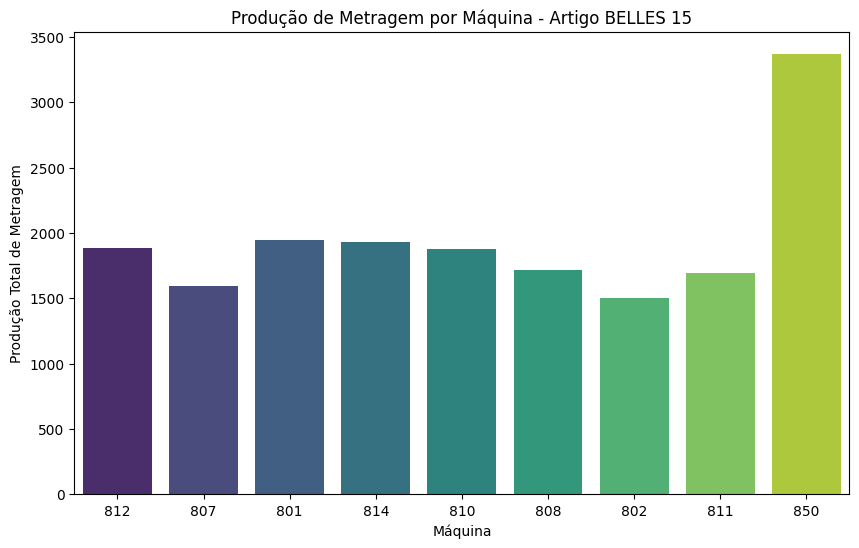

In [12]:
# Filtro para o artigo BELLES 15
df_belles15 = df[df['ARTIGO'] == 'BELLES 15']

# Agrupar por máquina e somar as metragens
total_metrage_belles = df_belles15.groupby('MAQUINA')['METRAGEM'].sum()

# Ordenar as máquinas pelo total de metragem em ordem decrescente
maquinas_belles_ordenadas = total_metrage_belles.sort_values(ascending=False).index

# Converter a coluna 'MAQUINA' para o tipo categórico com a ordem desejada
df_belles15['MAQUINA'] = pd.Categorical(df_belles15['MAQUINA'], categories=maquinas_belles_ordenadas, ordered=True)

# Plotar gráfico de barras para a produção de METRAGEM por máquina para o artigo BELLES 15
plt.figure(figsize=(10, 6))
sns.barplot(x='MAQUINA', y='METRAGEM', data=df_belles15, ci=None, palette="viridis", order=maquinas_belles_ordenadas)
plt.title('Produção de Metragem por Máquina - Artigo BELLES 15')
plt.xlabel('Máquina')
plt.ylabel('Produção Total de Metragem')
plt.show()

Máquinas ordenadas: Int64Index([812, 807, 801, 814, 810, 808, 802, 811, 850], dtype='int64', name='MAQUINA')
Total de metragem por máquina: MAQUINA
801    38905.2
802    17976.0
807    39804.0
808    22341.6
810    24396.0
811    16927.4
812    43420.6
814    38605.6
850    10100.8
Name: METRAGEM, dtype: float64


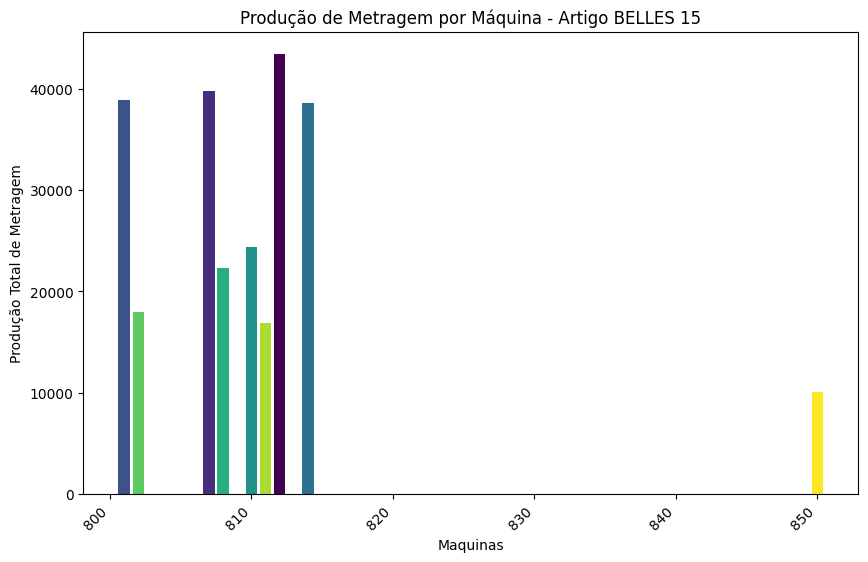

In [18]:
# Filtro para o artigo BELLES 15
df_belles15 = df[df['ARTIGO'] == 'BELLES 15']

# Agrupar por máquina e somar as metragens
total_metrage_belles = df_belles15.groupby('MAQUINA')['METRAGEM'].sum()

# Imprimir as variáveis-chave para diagnóstico
print("Máquinas ordenadas:", maquinas_belles_ordenadas)
print("Total de metragem por máquina:", total_metrage_belles)

# Escolher uma paleta de cores do Matplotlib (exemplo: 'viridis')
cores = plt.cm.viridis(np.linspace(0, 1, len(maquinas_belles_ordenadas)))

# Criar um gráfico de barras usando Matplotlib
plt.figure(figsize=(10, 6))
plt.bar(maquinas_belles_ordenadas, total_metrage_belles[maquinas_belles_ordenadas], color=cores)
plt.title('Produção de Metragem por Máquina - Artigo BELLES 15')
plt.xlabel('Maquinas')
plt.ylabel('Produção Total de Metragem')
plt.xticks(rotation=45, ha='right')  # Rotacionar os rótulos das máquinas para melhor legibilidade
plt.show()

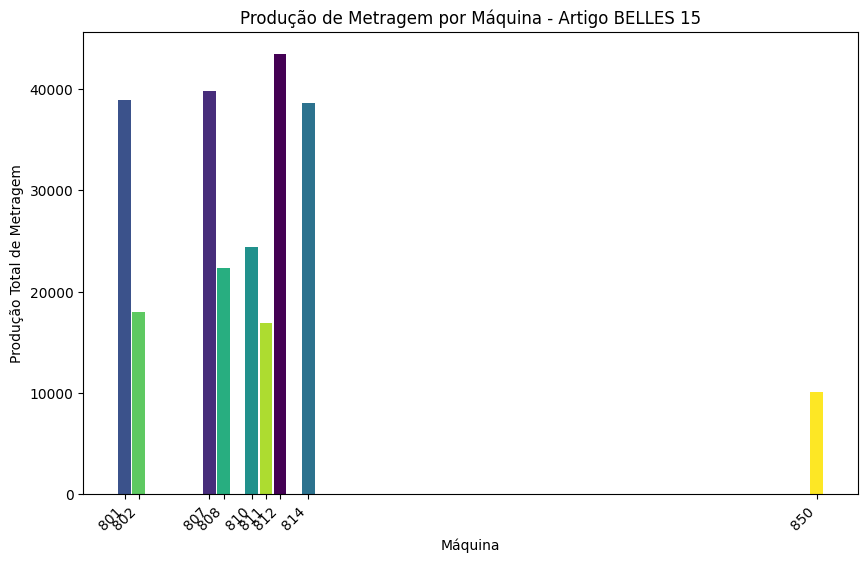

In [32]:
# Filtro para o artigo BELLES 15
df_belles15 = df[df['ARTIGO'] == 'BELLES 15']

# Agrupar por máquina e somar as metragens
total_metrage_belles = df_belles15.groupby('MAQUINA')['METRAGEM'].sum()

# Ordenar as máquinas pelo total de metragem em ordem decrescente
maquinas_belles_ordenadas = total_metrage_belles.sort_values(ascending=False).index

# Filtrar as máquinas apenas para as relacionadas ao artigo 'BELLES 15'
maquinas_belles_15 = df_belles15['MAQUINA'].unique()

# Escolher uma paleta de cores do Matplotlib (exemplo: 'viridis')
cores = plt.cm.viridis(np.linspace(0, 1, len(maquinas_belles_ordenadas)))

# Criar um gráfico de barras usando Matplotlib
plt.figure(figsize=(10, 6))
plt.bar(maquinas_belles_ordenadas, total_metrage_belles[maquinas_belles_ordenadas], color=cores, width=0.9)
plt.title('Produção de Metragem por Máquina - Artigo BELLES 15')
plt.xlabel('Máquina')
plt.ylabel('Produção Total de Metragem')
plt.xticks(maquinas_belles_15, rotation=45, ha='right')  # Rotacionar os rótulos das máquinas para melhor legibilidade
plt.show()

In [ ]:
total_de_metragem_por_maq= df.groupby('MAQUINA')['METRAGEM'].sum()
maq_mais_metros= total_de_metragem_por_maq.idxmax()
metros_da_maquina_mais_metros= total_de_metragem_por_maq.max()
print(f'A máquina com mais metros é {maq_mais_metros} com um total de {metros_da_maquina_mais_metros} metros')

A máquina com mais metros é 804 com um total de 62108.4 metros


In [ ]:
# Agrupar por máquina e somar as metragens
total_metrage_por_maquina = df.groupby('MAQUINA')['METRAGEM'].sum()

# Ordenar as máquinas pelo total de metragem em ordem decrescente
maquinas_ordenadas_por_metros = total_metrage_por_maquina.sort_values(ascending=False)

print("Máquinas ordenadas pelo total de metragem:")
print(maquinas_ordenadas_por_metros)

Máquinas ordenadas pelo total de metragem:
MAQUINA
804    62108.400
904    55000.008
825    52869.348
906    50277.560
827    50189.668
838    44514.800
812    41644.400
801    38905.200
814    38605.600
807    38156.200
903    33131.640
830    31717.000
803    29721.200
832    26195.310
806    24520.680
810    24396.000
809    23798.400
835    23392.800
805    23320.160
808    22341.600
902    22202.672
824    21684.900
813    20732.720
819    20200.296
815    19353.600
821    19162.980
820    18538.000
833    18009.000
802    17976.000
811    16927.400
901    16160.200
816    11861.230
908    11499.861
850    10100.800
909     9770.508
818     5643.000
840     4454.240
907     3714.500
842     2124.240
817     1248.000
841      428.400
Name: METRAGEM, dtype: float64


In [ ]:
# Filtrar o DataFrame para incluir apenas as linhas com o artigo 'BELLES'
df_belles = df[df['ARTIGO'] == 'BELLES 15']

# Agrupar por máquina e somar as metragens
total_metrage_belles = df_belles.groupby('MAQUINA')['METRAGEM'].sum()

# Ordenar as máquinas pelo total de metragem em ordem decrescente
maquinas_belles_ordenadas_por_metros = total_metrage_belles.sort_values(ascending=False)

print("Máquinas do artigo 'BELLES 15' ordenadas pelo total de metragem:")
print(maquinas_belles_ordenadas_por_metros)

Máquinas do artigo 'BELLES 15' ordenadas pelo total de metragem:
MAQUINA
812    41644.4
801    38905.2
814    38605.6
807    38156.2
810    24396.0
808    22341.6
802    17976.0
811    16927.4
850    10100.8
Name: METRAGEM, dtype: float64


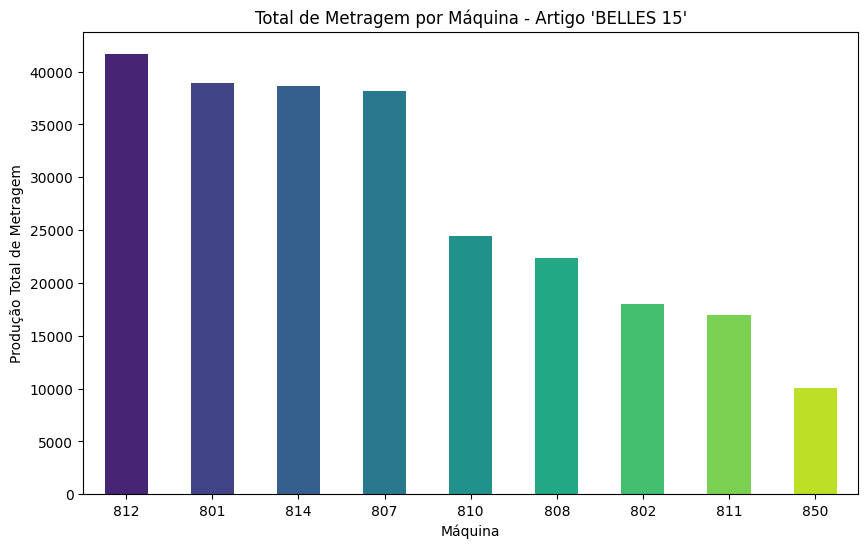

In [ ]:
cores = sns.color_palette('viridis', len(maquinas_belles_ordenadas_por_metros))

# Plotar gráfico de barras com cores diferentes
plt.figure(figsize=(10, 6))
maquinas_belles_ordenadas_por_metros.plot(kind='bar', color=cores)
plt.title("Total de Metragem por Máquina - Artigo 'BELLES 15'")
plt.xlabel('Máquina')
plt.ylabel('Produção Total de Metragem')
plt.xticks(rotation=0)
plt.show();

C:\Users\dulor\AppData\Local\Temp\ipykernel_15696\1234171642.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='MAQUINA', y='METRAGEM', data=df_belles15, ci=None, palette="viridis")
C:\Users\dulor\AppData\Local\Temp\ipykernel_15696\1234171642.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='MAQUINA', y='METRAGEM', data=df_belles15, ci=None, palette="viridis")


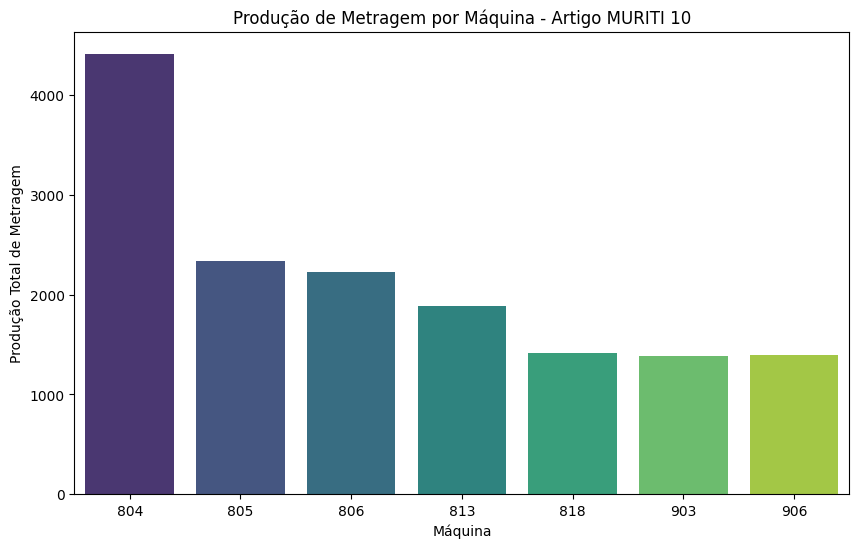

In [ ]:
# Filtro para o artigo BELLES 15
df_belles15 = df[df['ARTIGO'] == 'MURITI 10']

# Plotar gráfico de barras para a produção de METRAGEM por máquina para o artigo BELLES 15
plt.figure(figsize=(10, 6))
sns.barplot(x='MAQUINA', y='METRAGEM', data=df_belles15, ci=None, palette="viridis")
plt.title('Produção de Metragem por Máquina - Artigo MURITI 10')
plt.xlabel('Máquina')
plt.ylabel('Produção Total de Metragem')
plt.show()


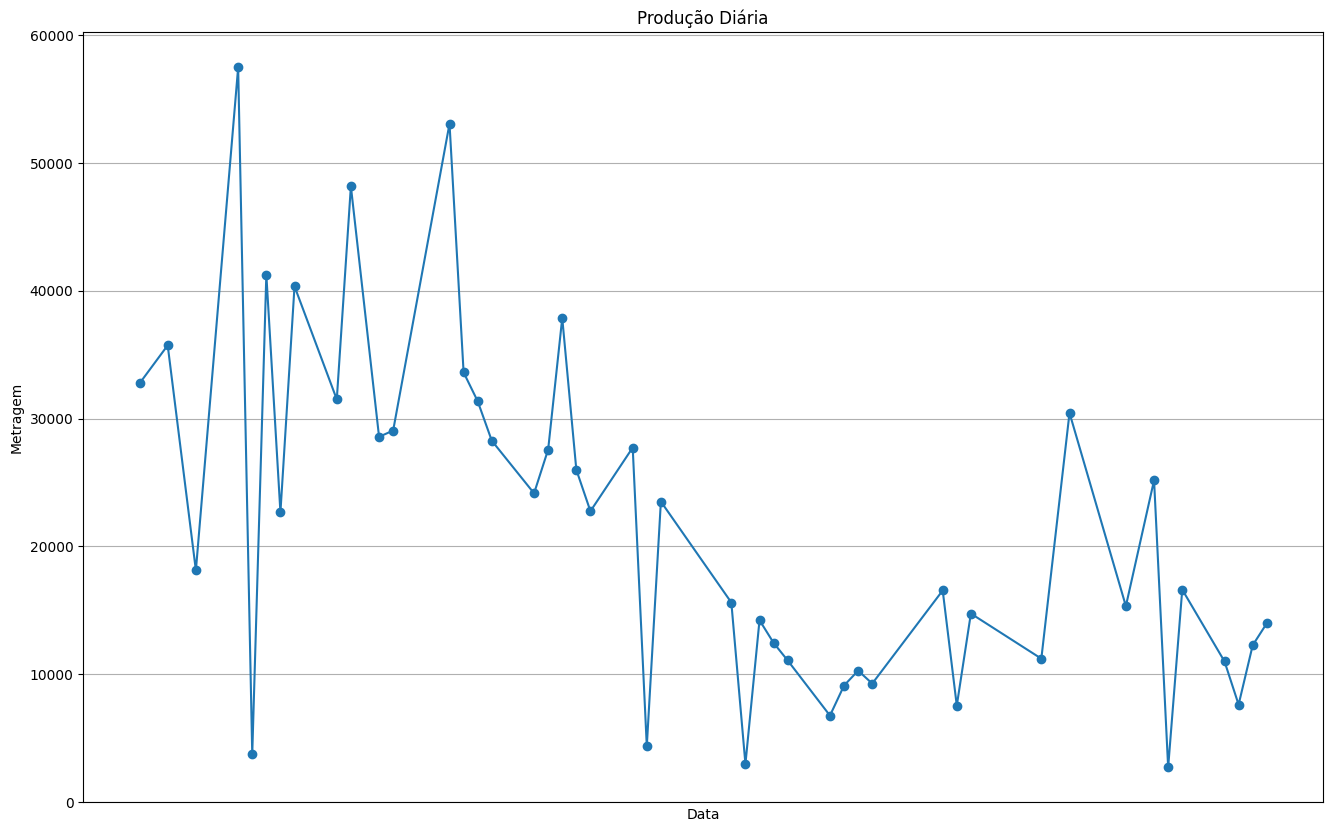

In [ ]:
df['DATA'] = pd.to_datetime(df['DATA'])

# Escolha as datas de início e fim desejadas
data_inicio = '2023-10-30'
data_fim = datetime.now().strftime('%Y-%m-%d')

# Filtrar o DataFrame com base nas datas escolhidas
df_filtrado = df[(df['DATA'] >= data_inicio) & (df['DATA'] <= data_fim)]

# Agregar a produção diária para as datas filtradas
producao_diaria = df_filtrado.groupby('DATA')['METRAGEM'].sum().reset_index()

# Plote o gráfico
plt.figure(figsize=(16, 10))
plt.plot(producao_diaria['DATA'], producao_diaria['METRAGEM'], marker='o')


# Ocultar as marcas do eixo x
plt.xticks([])

plt.title('Produção Diária')
plt.xlabel('Data')
plt.ylabel('Metragem')
plt.grid(True)
plt.show()


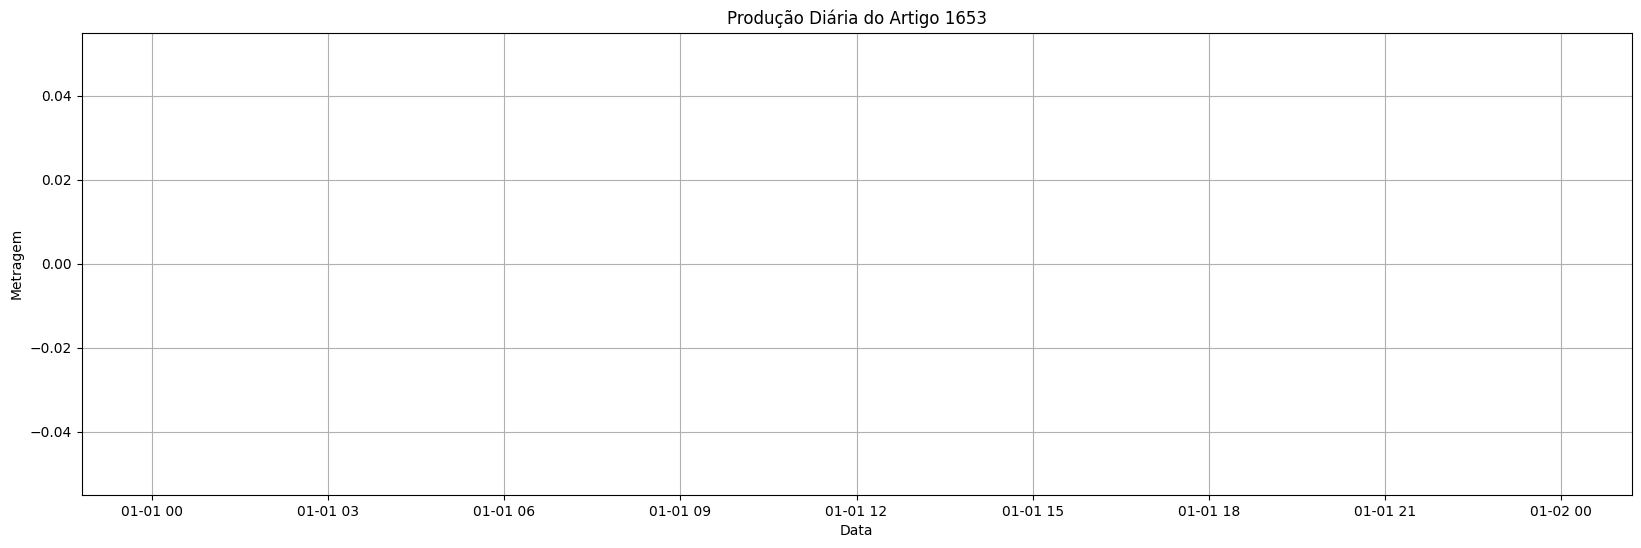

In [ ]:
artigo= input('digite o artigo de interesse: ') # DIITE EM CAIXA ALTA. EX: BELLES 15
dados = df[df['ARTIGO'] == artigo]

# Agrupe os dados por data e some a metragem diária
producao_diaria = dados.groupby('DATA')['METRAGEM'].sum().reset_index()

# Plote o gráfico
plt.figure(figsize=(20, 6))
plt.plot(producao_diaria['DATA'], producao_diaria['METRAGEM'], marker='o', label=artigo)
plt.title(f'Produção Diária do Artigo {artigo}')
plt.xlabel('Data')
plt.ylabel('Metragem')
plt.grid(True)


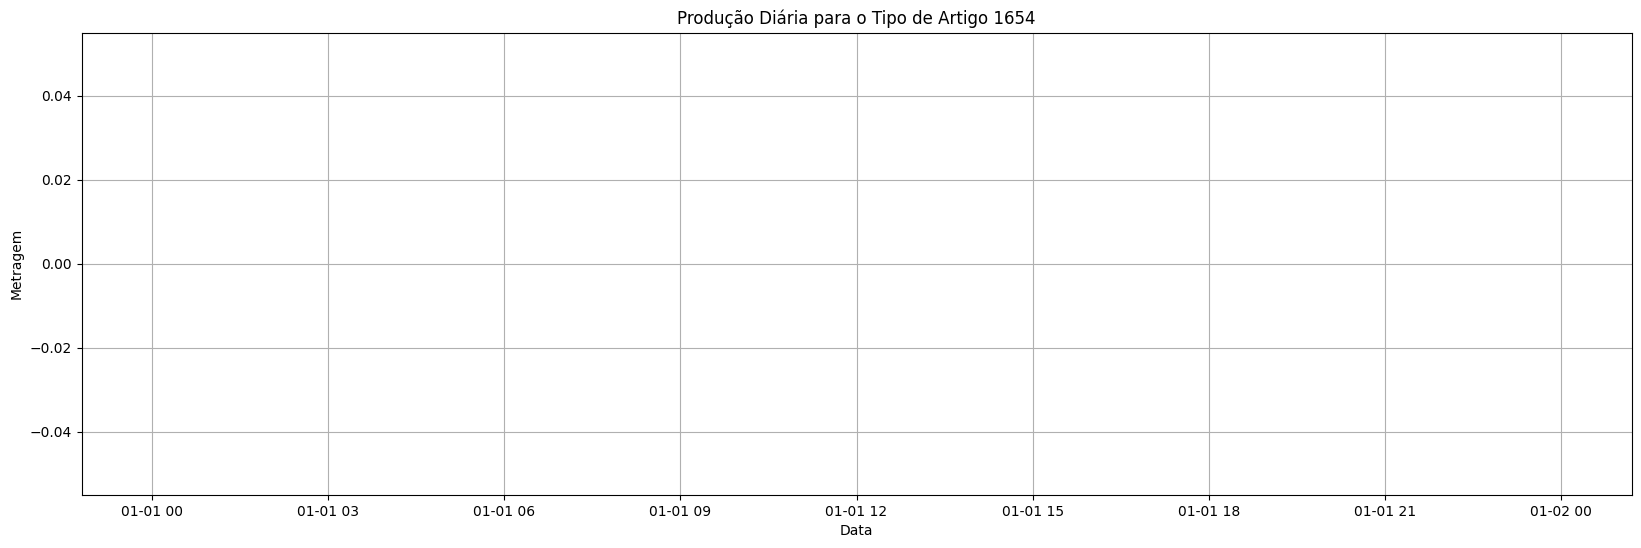

In [ ]:
artigo= input('digite o artigo de interesse: ')
dados = df[df['ARTIGO'] == artigo]

# Agrupe os dados por data e some a metragem diária
producao_diaria = dados.groupby('DATA')['METRAGEM'].sum().reset_index()

# Plote o gráfico
plt.figure(figsize=(20, 6))
plt.plot(producao_diaria['DATA'], producao_diaria['METRAGEM'], marker='o', label=artigo)
plt.title(f'Produção Diária para o Tipo de Artigo {artigo}')
plt.xlabel('Data')
plt.ylabel('Metragem')
plt.grid(True)

In [ ]:
# PASSANDO O DF PARA UM ARRAY
peso_arry= np.array(df['PESO'].astype('float').to_list())
peso_arry[0:5]

array([ 2.4,  6. , 18.6,  2.4,  7.8])

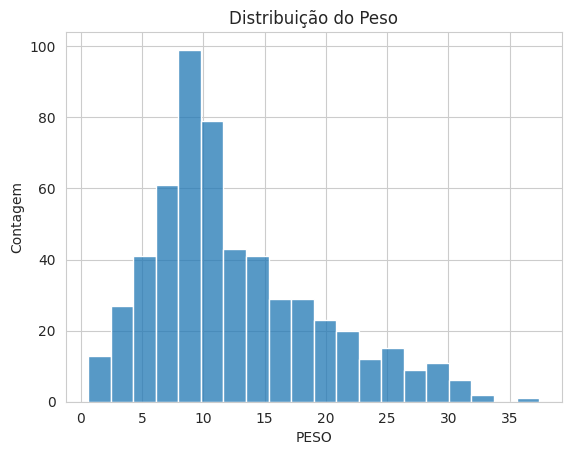

In [ ]:
with sns.axes_style('whitegrid'):
    grafico= sns.histplot(data=df['PESO'], bins=20)
    grafico.set(title='Distribuição do Peso', xlabel='PESO', ylabel='Contagem');

In [ ]:
# Função para calcular os quartis
def calcular_quartis(grupo):
    quartis= np.percentile(grupo['METRAGEM'], [25, 50, 75])
    return pd.Series(quartis, index=['Q1', 'Q2 (Mediana)', 'Q3'])

# Agrupar por 'artigo' e aplicar a função de cálculo de quartis a cada grupo
resultados_quartis= df.groupby('ARTIGO').apply(calcular_quartis)

# CRIANDO UM DF
df_quartis= resultados_quartis.reset_index()
df_quartis


,ARTIGO,Q1,Q2 (Mediana),Q3
0,1653,1890.9075,2020.7310,2077.176
1,06 DE LYCRA,2526.3500,3949.4000,4144.700
2,08 DE LYCRA,3344.4000,3678.8400,4147.056
3,BALLI 16,459.8000,691.6000,892.000
4,BELLES 15,1284.0000,1712.0000,2140.000
5,BELLES 24,701.1000,922.5000,1057.800
6,COS 16,1212.2700,1307.3500,1592.590
7,MARCEL 30,349.2000,388.0000,465.600
8,MARCEL 40,253.1700,281.3000,289.060
9,MONE 15,119.8500,142.8000,165.750
